# Table of Content

- [1. Improting libraries](#1.0)

- [2. Reading Datasets](#2.0)

- [3. Dataset Overview & Preparation](#3.0)

  - [3.1 Discription of dataset features](#3.1)
  - [3.2 Information of dataset features](#3.2)
  - [3.3 Renaming Features names](#3.3)
  - [3.4 Statistical Analysis](#3.4)

- [4. Exploratary Data Analysis (EDA)](#4.0)

  - [4.1 Age](#4.1)
  - [4.2 Sex](#4.2)
  - [4.3 Chest pain](#4.3)
  - [4.4 Resting blood pressure](#4.4)
  - [4.5 cholesterol](#4.5)
  - [4.6 Fasting blood sugar](#4.6)
  - [4.7 electrocardiographic](#4.7)
  - [4.8 Maximum heart rate](#4.8)
  - [4.9 Exercise induced angina](#4.9)
  - [4.10 old peak](#4.10)
  - [4.11 Slope of peak exercise](#4.11)
  - [4.12 Number major vessels](#4.12)
  - [4.13 stress test](#4.13)
  - [4.14 Heart disease](#4.14)

- [5. Bivariate Analysis](#5.0)
  - [5.1 Numerical data](#5.1)
  - [5.2 Categorical data](#5.2)


# [1. Improting libraries](#1.0)


In [349]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingRegressor,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

pd.options.display.max_columns = None

# [2. Reading Datasets](#2.0)


In [350]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/DataSets/heart.csv"
)
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<div style="padding:0px; font-size:7px; border-radius: 10px;">
    <table style="width: 50%; background-color:#f0f8ff;">
        <tr>
            <th style="text-align:center;font-size:20px;"><b>Variable</b></th>
            <th style="text-align:center;font-size:20px;"><b>Description</b></th>
            <th style="text-align:center;font-size:20px;"><b>Data Type</b></th>
        </tr>
        <tr>
            <td style="text-align:center; color:#0f52ba;font-size:15px;"><strong>age</strong></td>
            <td style="text-align:center; color:#0f52ba;font-size:15px;">Age of the patient in years</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>sex</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Gender of the patient:<br>0: female<br>1: male</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>cp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Type of chest pain:<br>0: Typical angina<br>1: Atypical angina<br>2: Non-anginal pain<br>3: Asymptomatic</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>trtbps</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting blood pressure in mmHg</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>chol</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Serum cholesterol in mg/dl</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>fbs</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Fasting blood sugar level categorized as above 120 mg/dl:<br>0: false<br>1: true</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>restecg</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Resting electrocardiographic results:<br>0: Normal<br>1: Having ST-T wave abnormality<br>2: Showing probable or definite left ventricular hypertrophy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thalachh</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Maximum heart rate achieved during a stress test</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>exng</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Exercise induced angina:<br>0: no<br>1: yes</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>oldpeak</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">ST depression induced by exercise relative to rest(unit -> depression)</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>slp</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flat<br>2: Downsloping</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>caa</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Number of major vessels (0-4) colored by fluoroscopy</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>thall</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Thalium stress test result:<br>0: Normal<br>1: Fixed defect<br>2: Reversible defect<br>3: Not described</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Nominal</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>output</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Heart disease status:<br>0: no disease<br>1: presence of disease</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>    
    </table>
</div>


# [3. Dataset Overview & Preparation](#3.0)


### [3.1 Discription of dataset features](#3.1)


In [351]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there are Spacing between values of mean between features, so Scaing is important </b><br>
    </span>    
</div>


### [3.2 Information of dataset features](#3.2)


In [352]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is no null values</b><br>
        <b>Insight: type of features is correct, and there is no objects, that means that all values is numeric</b><br>
    </span>    
</div>


In [353]:
heart_df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### [3.3 Renaming Features names](#3.3)


In [354]:
mapper = {
    "age": "Age",
    "sex": "Sex",
    "cp": "Chest_pain",
    "trtbps": "Resting_blood_pressure",
    "chol": "cholesterol",
    "fbs": "Fasting_blood_sugar",
    "restecg": "electrocardiographic",
    "thalachh": "Maximum_heart_rate",
    "exng": "Exercise_induced_angina",
    "oldpeak": "old_peak",
    "slp": "Slope_of_peak_exercise",
    "caa": "Number_major_vessels",
    "thall": "stress_test",
    "output": "Heart_disease",
}

heart_df.rename(columns=mapper, inplace=True)

In [355]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### [3.4 Statistical Analysis](#3.4)


In [356]:
for col in heart_df.columns:
    print(
        col,
        " has maximum repeted value precentage = ",
        heart_df[col].value_counts().max() * 100 / len(heart_df[col]),
    )

Age  has maximum repeted value precentage =  6.270627062706271
Sex  has maximum repeted value precentage =  68.31683168316832
Chest_pain  has maximum repeted value precentage =  47.194719471947195
Resting_blood_pressure  has maximum repeted value precentage =  12.211221122112212
cholesterol  has maximum repeted value precentage =  1.9801980198019802
Fasting_blood_sugar  has maximum repeted value precentage =  85.14851485148515
electrocardiographic  has maximum repeted value precentage =  50.165016501650165
Maximum_heart_rate  has maximum repeted value precentage =  3.6303630363036303
Exercise_induced_angina  has maximum repeted value precentage =  67.32673267326733
old_peak  has maximum repeted value precentage =  32.67326732673267
Slope_of_peak_exercise  has maximum repeted value precentage =  46.864686468646866
Number_major_vessels  has maximum repeted value precentage =  57.755775577557756
stress_test  has maximum repeted value precentage =  54.78547854785479
Heart_disease  has maxi

In [357]:
heart_df[["Fasting_blood_sugar"]].value_counts(), heart_df[
    "Sex"
].value_counts(), heart_df["electrocardiographic"].value_counts()

(Fasting_blood_sugar
 0                      258
 1                       45
 Name: count, dtype: int64,
 Sex
 1    207
 0     96
 Name: count, dtype: int64,
 electrocardiographic
 1    152
 0    147
 2      4
 Name: count, dtype: int64)

In [358]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
electrocardiographic,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Maximum_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# [4. Exploratary Data Analysis (EDA)](#4.0)


In [359]:
heart_df

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [360]:
mappings = {
    "Sex": {0: "Female", 1: "Male"},
    "Chest_pain": {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic",
    },
    "Fasting_blood_sugar": {0: False, 1: True},
    "electrocardiographic": {0: "Normal", 1: "Abnormality", 2: "Hypertrophy"},
    "Exercise_induced_angina": {0: "No", 1: "Yes"},
    "Slope_of_peak_exercise": {0: "Upsloping", 1: "Flat", 2: "Downsloping"},
    "stress_test": {
        0: "Normal",
        1: "Fixed defect",
        2: "Reversible defect",
        3: "Not described",
    },
    "Heart_disease": {0: "No Disease", 1: "Heart Disease"},
}


plot_datset = heart_df


def map_values(x, mapping):
    return mapping.get(x, x)


for feature, mapping in mappings.items():
    plot_datset[feature] = plot_datset[feature].map(lambda x: map_values(x, mapping))
    plot_datset[feature] = plot_datset[feature].astype(object)


plot_datset

,Age,Sex,Chest_pain,Resting_blood_pressure,cholesterol,Fasting_blood_sugar,electrocardiographic,Maximum_heart_rate,Exercise_induced_angina,old_peak,Slope_of_peak_exercise,Number_major_vessels,stress_test,Heart_disease
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease


### Mehodes


In [361]:
def skewness(feature):
    skew = heart_df[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

In [362]:
def get_outliers(feature):
    Q1 = heart_df[feature].quantile(0.25)
    Q2 = heart_df[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = heart_df[
        (heart_df[feature] < lower_limit) | (heart_df[feature] > upper_limit)
    ]

    print("lower_limit = ", lower_limit)
    print("upper_limit = ", upper_limit)
    print("number of outliers = ", len(IQR_df))

In [363]:
def box_plot(feature):
    if plot_datset[feature].dtype != "O":
        mean_value = plot_datset[feature].mean()
        median_value = plot_datset[feature].median()
        mode_value = plot_datset[feature].mode().values[0]
        std_value = plot_datset[feature].std()
        min_value = plot_datset[feature].min()
        max_value = plot_datset[feature].max()
    plt.figure(figsize=(8, 4))
    plt.rcParams["axes.facecolor"] = "#D6F3FF"
    sns.boxplot(data=plot_datset, x=feature, color="#45b1e8")
    if plot_datset[feature].dtype != "O":
        plt.axvline(
            mean_value,
            color="b",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            median_value,
            color="r",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            std_value + mean_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            mean_value - std_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            min_value,
            color="yellow",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            max_value,
            color="orange",
            linestyle="--",
            linewidth=1.5,
        )
        plt.axvline(
            mode_value,
            color="b",
            linestyle="--",
            linewidth=1.5,
        )
    plt.title(feature + " box plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [364]:
def histgram(feature):
    if plot_datset[feature].dtype != "O":
        mean_value = plot_datset[feature].mean()
        median_value = plot_datset[feature].median()
        mode_value = plot_datset[feature].mode().values[0]
        std_value = plot_datset[feature].std()
        min_value = plot_datset[feature].min()
        max_value = plot_datset[feature].max()
    plt.figure(figsize=(8, 4))
    plt.rcParams["axes.facecolor"] = "#D6F3FF"
    sns.histplot(data=plot_datset, x=feature, kde=True, color="#45b1e8")

    if plot_datset[feature].dtype != "O":
        plt.axvline(
            mean_value, color="b", linestyle="--", linewidth=1.5, label="mean value"
        )
        plt.axvline(
            median_value, color="r", linestyle="--", linewidth=1.5, label="mean value"
        )
        plt.axvline(
            std_value + mean_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="std value + mean value",
        )
        plt.axvline(
            mean_value - std_value,
            color="black",
            linestyle="--",
            linewidth=1.5,
            label="mean_value - std_value",
        )
        plt.axvline(
            min_value, color="yellow", linestyle="--", linewidth=1.5, label="min value"
        )
        plt.axvline(
            max_value, color="orange", linestyle="--", linewidth=1.5, label="max value"
        )
        plt.axvline(
            mode_value, color="b", linestyle="--", linewidth=1.5, label="mode value"
        )
    plt.title(feature + " box plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [365]:
def bar_chart(feature):
    fig, axs = plt.subplots(1, 1, figsize=(5, 3))
    category_counts = plot_datset[feature].value_counts()

    bars = axs.barh(category_counts.index, category_counts.values, color="#45b1e8")
    for bar, values in zip(bars, category_counts):
        width = bar.get_width()
        axs.text(
            width,
            bar.get_y() + bar.get_height() / 2,
            int(width),
            ha="left",
            va="center",
            color="black",
            fontsize=10,
        )

    plt.title(feature + " bar plot")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [366]:
def pie_chart(feature):

    plt.figure(figsize=(6, 5))

    category_counts = plot_datset[feature].value_counts()

    plt.pie(
        category_counts,
        labels=category_counts.index,
        shadow=True,
        wedgeprops={"edgecolor": "black"},
        startangle=0,
        autopct="%3.2f%%",
        radius=1.6,
        textprops={"fontsize": 12},
        colors=sns.color_palette("rocket"),
    )
    plt.pie(
        x=category_counts,
        radius=1.2,
        colors="w",
        wedgeprops={"edgecolor": "white"},
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

### [4.1 Age](#4.1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


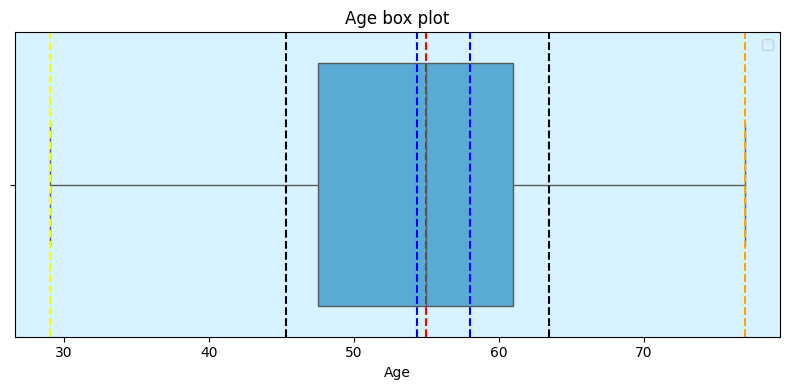

In [367]:
box_plot("Age")

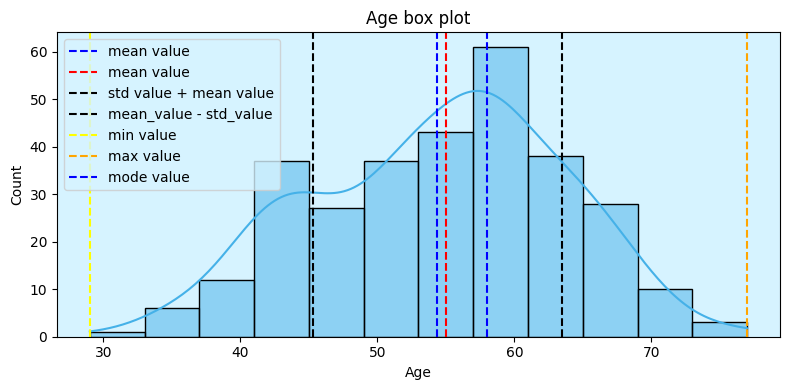

Skewness of the  Age  =  -0.2024633654856539
The distribution is left-skewed.


In [368]:
histgram("Age")
skewness("Age")

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: mean ages is about 55 years old</b><br>
        <b>Insight: the most common is 58 years. It shows the age with the highest frequency</b><br>
    </span>    
</div>


In [369]:
get_outliers("Age")

lower_limit =  27.25
upper_limit =  81.25
number of outliers =  0


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: There is no outliers</b><br>
    </span>    
</div>


### [4.2 Sex](#4.2)


In [370]:
heart_df["Sex"].value_counts()

Sex
Male      207
Female     96
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


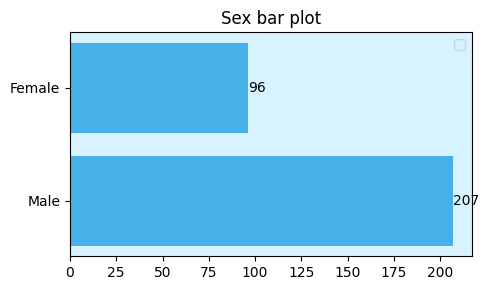

In [371]:
bar_chart("Sex")

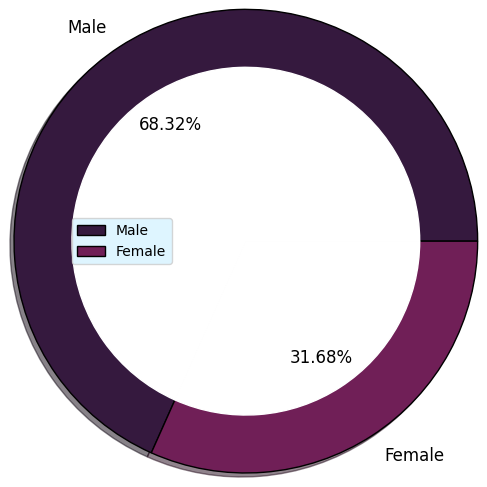

In [372]:
pie_chart("Sex")

### [4.3 Chest pain](#4.3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


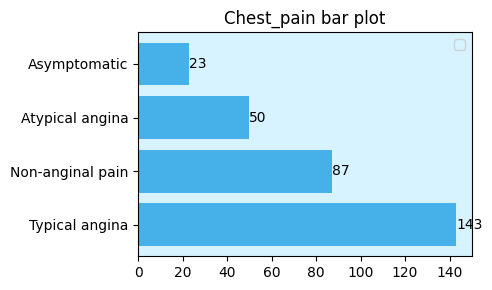

In [373]:
bar_chart("Chest_pain")

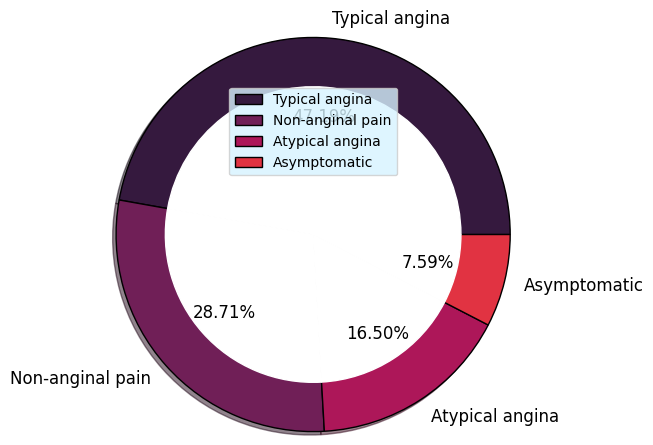

In [374]:
pie_chart("Chest_pain")

### [4.4 Resting blood pressure](#4.4)


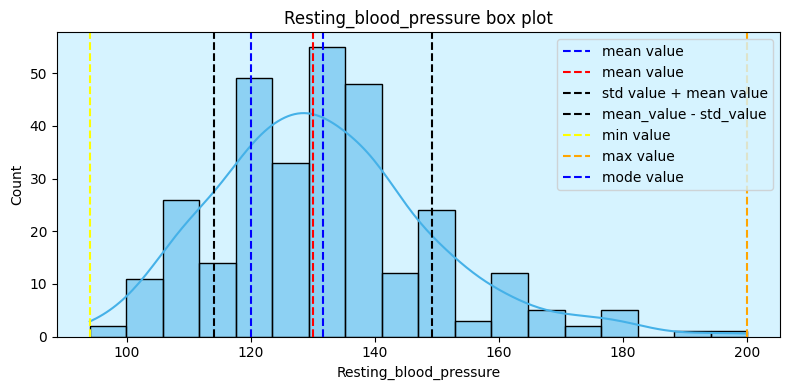

In [375]:
histgram("Resting_blood_pressure")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


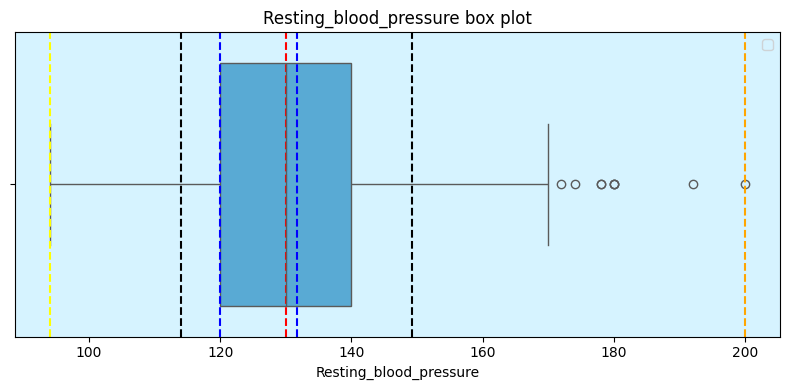

In [376]:
box_plot("Resting_blood_pressure")

In [377]:
skewness("Resting_blood_pressure")

Skewness of the  Resting_blood_pressure  =  0.7137684379181465
The distribution is right-skewed.


In [378]:
get_outliers("Resting_blood_pressure")

lower_limit =  90.0
upper_limit =  170.0
number of outliers =  9


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average resting blood pressure is 131.62 mmHg</b><br>
        <b> Median: At 130 mmHg, this value divides the dataset into two halves</b><br>
        <b> Mode: The most frequent blood pressure is 120 mmHg</b><br>
        <b> STD: With a value of 17.54 mmHg, it measures the spread of blood pressures around the mean</b><br>
        <b> the minimum resting blood pressure recorded is 94 mmHg, and the maximum is 200 mmHg </b><br>
        <b> There is 13 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.5 cholesterol](#4.5)


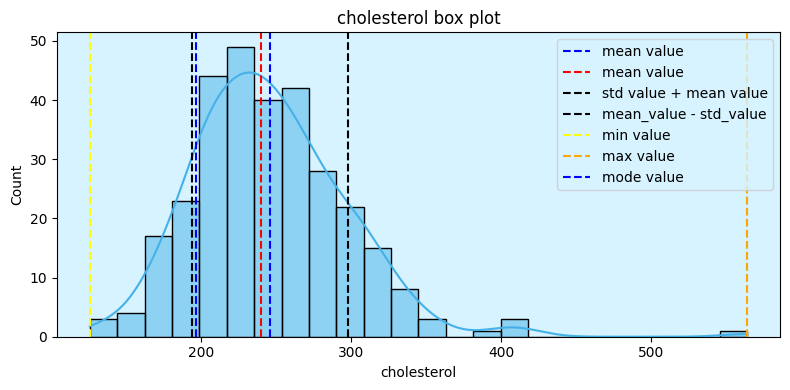

In [379]:
histgram("cholesterol")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


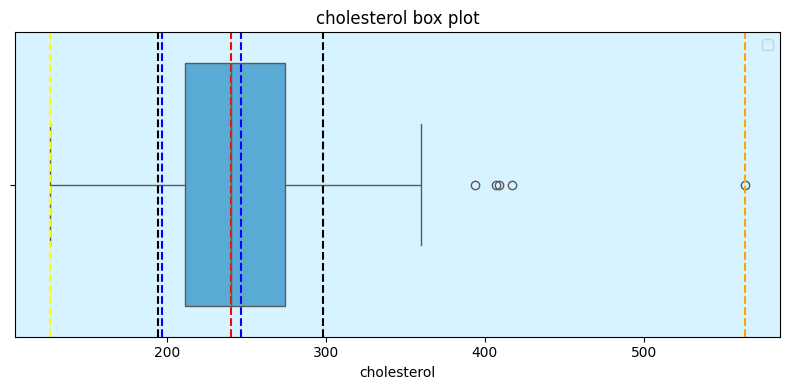

In [380]:
box_plot("cholesterol")

In [381]:
skewness("cholesterol")

Skewness of the  cholesterol  =  1.1434008206693387
The distribution is right-skewed.


In [382]:
get_outliers("cholesterol")

lower_limit =  115.75
upper_limit =  369.75
number of outliers =  5


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average cholesterol level is 246.26</b><br>
        <b> Median: The median cholesterol level is 240</b><br>
        <b> Mode: The most frequent cholesterol level is 197</b><br>
        <b> STD: With a value of 17.54 mmHg, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 5 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.6 Fasting blood sugar](#4.6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


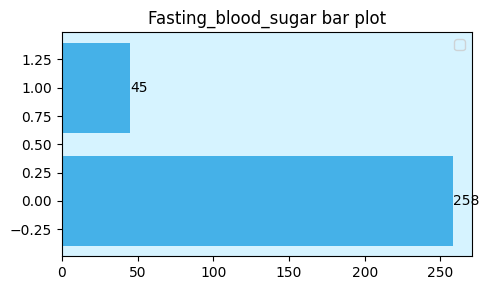

In [383]:
bar_chart("Fasting_blood_sugar")

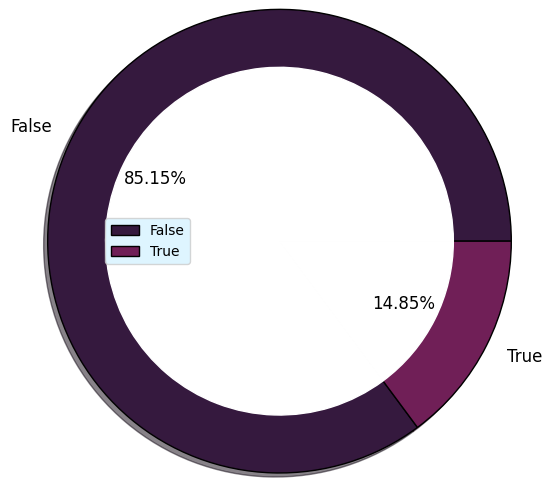

In [384]:
pie_chart("Fasting_blood_sugar")

### [4.7 electrocardiographic](#4.7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


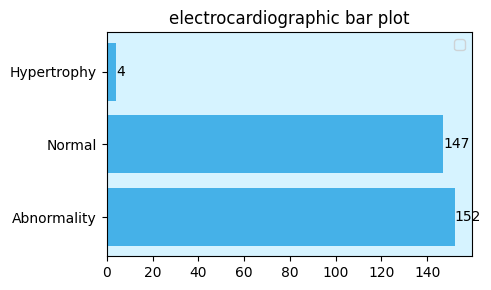

In [385]:
bar_chart("electrocardiographic")

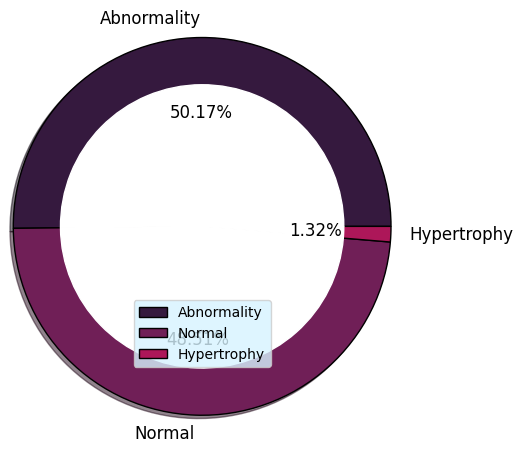

In [386]:
pie_chart("electrocardiographic")

### [4.8 Maximum heart rate](#4.8)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


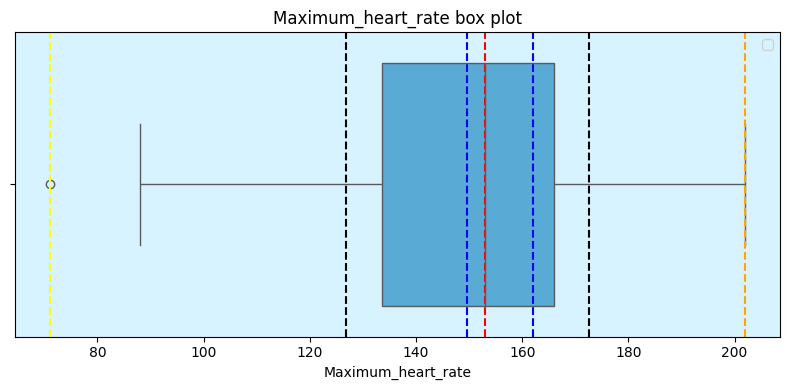

In [387]:
box_plot("Maximum_heart_rate")

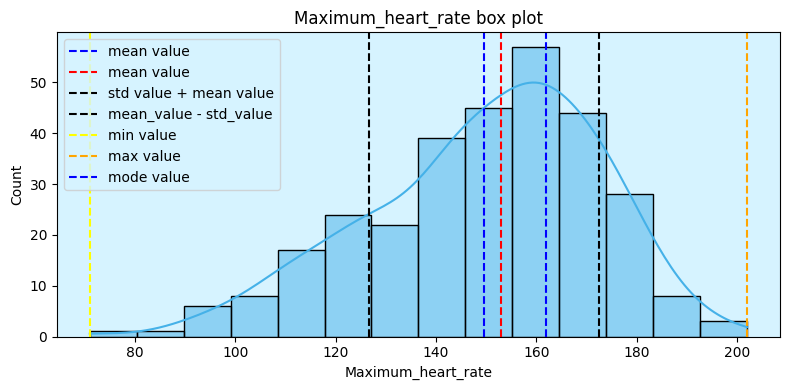

In [388]:
histgram("Maximum_heart_rate")

In [389]:
skewness("Maximum_heart_rate")

Skewness of the  Maximum_heart_rate  =  -0.5374096526832253
The distribution is left-skewed.


In [390]:
get_outliers("Maximum_heart_rate")

lower_limit =  84.75
upper_limit =  214.75
number of outliers =  1


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average maximum heart rate is 149.65</b><br>
        <b> Median: The median maximum heart rate is 153</b><br>
        <b> Mode: The most frequent maximum heart rate is 162</b><br>
        <b> STD: With a value of 22.91, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 1 outliers data points </b><br>
        <b> The distribution is left-skewed </b><br>
    </span>    
</div>


### [4.9 Exercise induced angina](#4.9)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


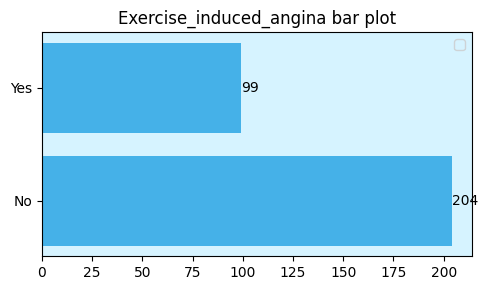

In [391]:
bar_chart("Exercise_induced_angina")

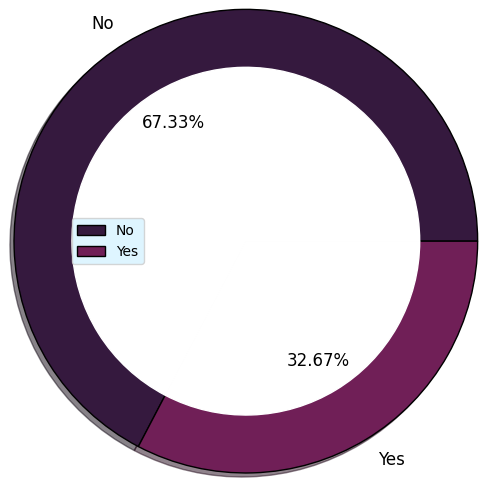

In [392]:
pie_chart("Exercise_induced_angina")

### [4.10 old peak](#4.10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


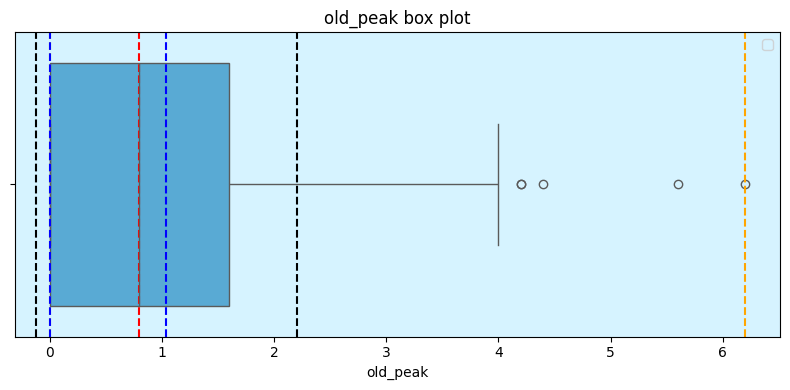

In [393]:
box_plot("old_peak")

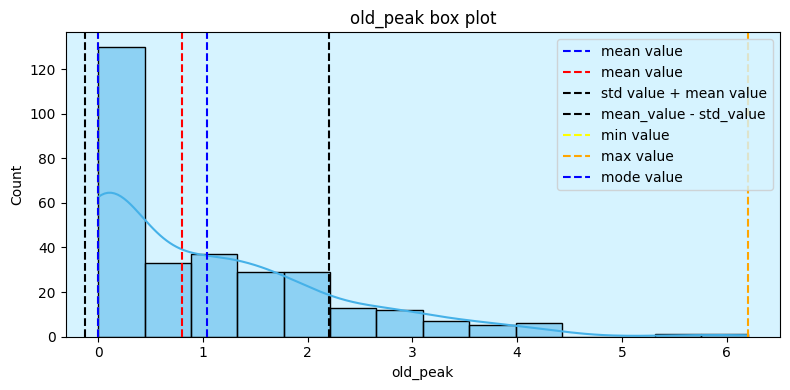

In [394]:
histgram("old_peak")

In [395]:
skewness("old_peak")

Skewness of the  old_peak  =  1.269719930601997
The distribution is right-skewed.


In [396]:
get_outliers("old_peak")

lower_limit =  -2.4000000000000004
upper_limit =  4.0
number of outliers =  5


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> Mean: The average OldPeak value is 1.04</b><br>
        <b> Median: The median OldPeak value is 0.80</b><br>
        <b> Mode: The most frequent OldPeak value is 0.00</b><br>
        <b> STD: With a value of 1.16, it measures the spread of cholesterol around the mean</b><br>
        <b> There is 5 outliers data points </b><br>
        <b> The distribution is right-skewed </b><br>
    </span>    
</div>


### [4.11 Slope of peak exercise](#4.11)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


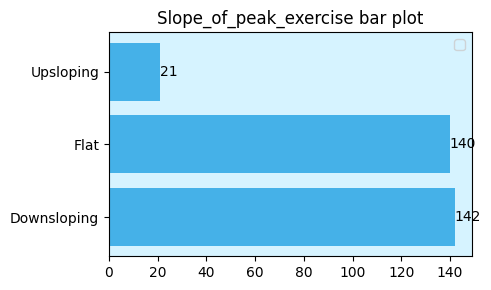

In [397]:
bar_chart("Slope_of_peak_exercise")

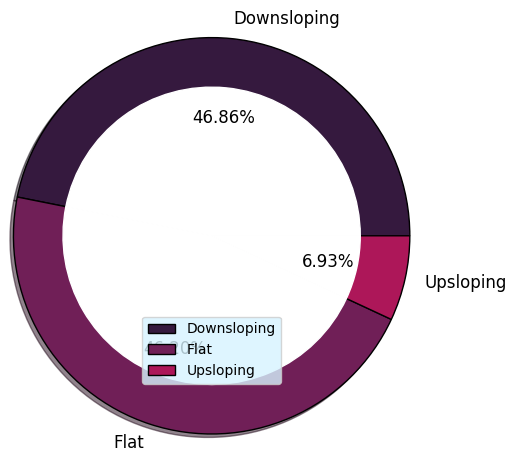

In [398]:
pie_chart("Slope_of_peak_exercise")

### [4.12 Number major vessels](#4.12)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


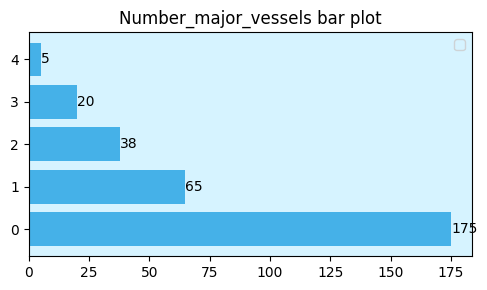

In [399]:
bar_chart("Number_major_vessels")

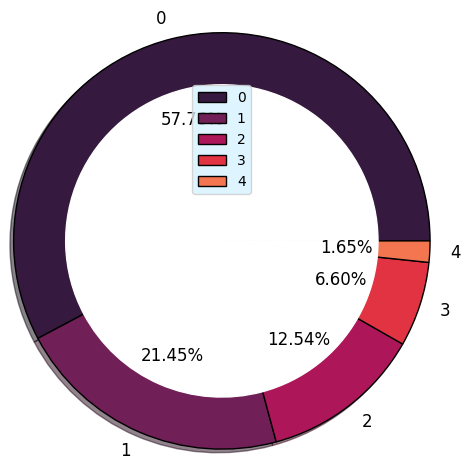

In [400]:
pie_chart("Number_major_vessels")

### [4.13 stress test](#4.13)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


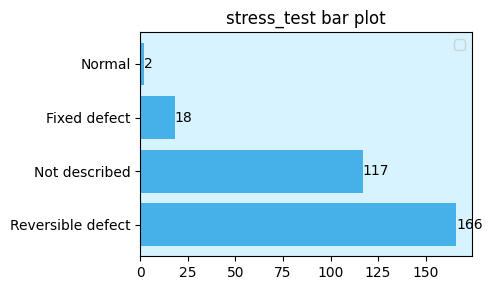

In [401]:
bar_chart("stress_test")

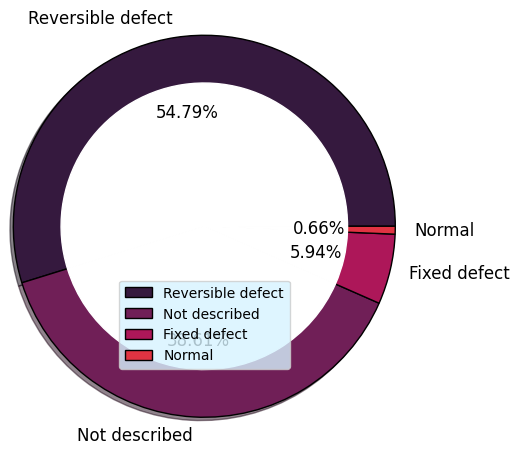

In [402]:
pie_chart("stress_test")

### [4.14 Heart disease](#4.14)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


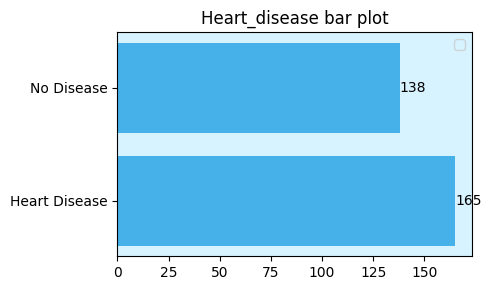

In [403]:
bar_chart("Heart_disease")

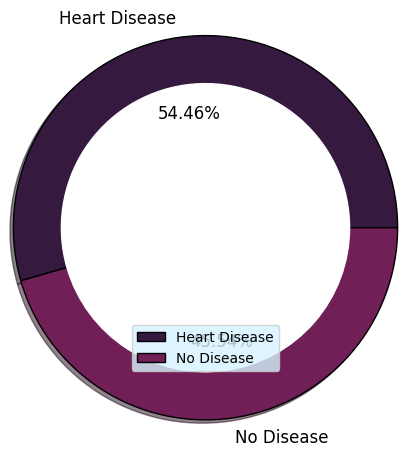

In [404]:
pie_chart("Heart_disease")

# [5. Bivariate Analysis](#5.0)


### [5.1 Numerical data](#5.1)


In [405]:
numerical_columns = []

for col in plot_datset.columns:
    if plot_datset[col].dtype != "O":
        numerical_columns.append(col)
numerical_columns.remove("Number_major_vessels")
numerical_columns

['Age',
 'Resting_blood_pressure',
 'cholesterol',
 'Maximum_heart_rate',
 'old_peak']

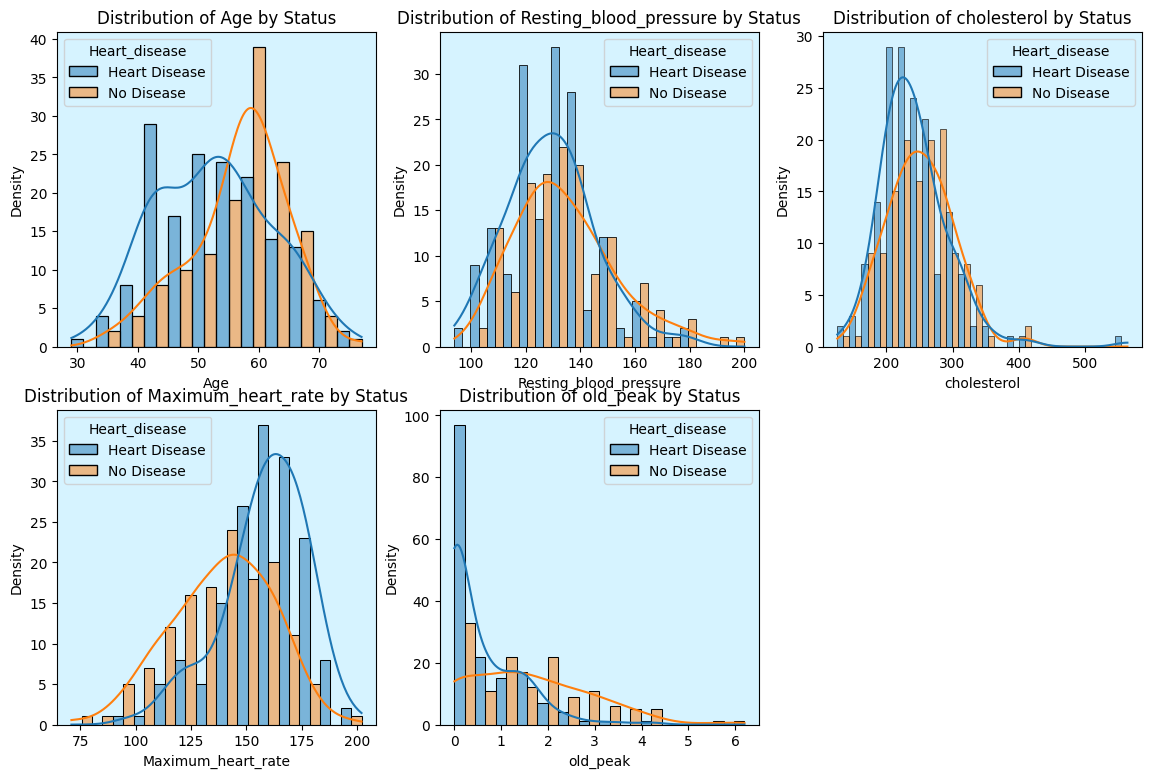

In [409]:
fig, axe = plt.subplots(2, 3, figsize=(14, 9))

for i, feature in enumerate(numerical_columns):

    row = i // 3
    col = i % 3
    ax = axe[row, col]

    sns.histplot(
        data=plot_datset,
        x=feature,
        hue="Heart_disease",
        kde=True,
        ax=ax,
        multiple="dodge",
    )
    ax.set_title(f"Distribution of {feature} by Status")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")

axe[1, 2].remove()
plt.show()

### [5.2 Categorical data](#5.2)


In [411]:
Categorical_columns = []

for col in plot_datset.columns:
    if plot_datset[col].dtype == "O":
        Categorical_columns.append(col)
Categorical_columns.append("Number_major_vessels")
Categorical_columns.remove("Heart_disease")
Categorical_columns

['Sex',
 'Chest_pain',
 'Fasting_blood_sugar',
 'electrocardiographic',
 'Exercise_induced_angina',
 'Slope_of_peak_exercise',
 'stress_test',
 'Number_major_vessels']

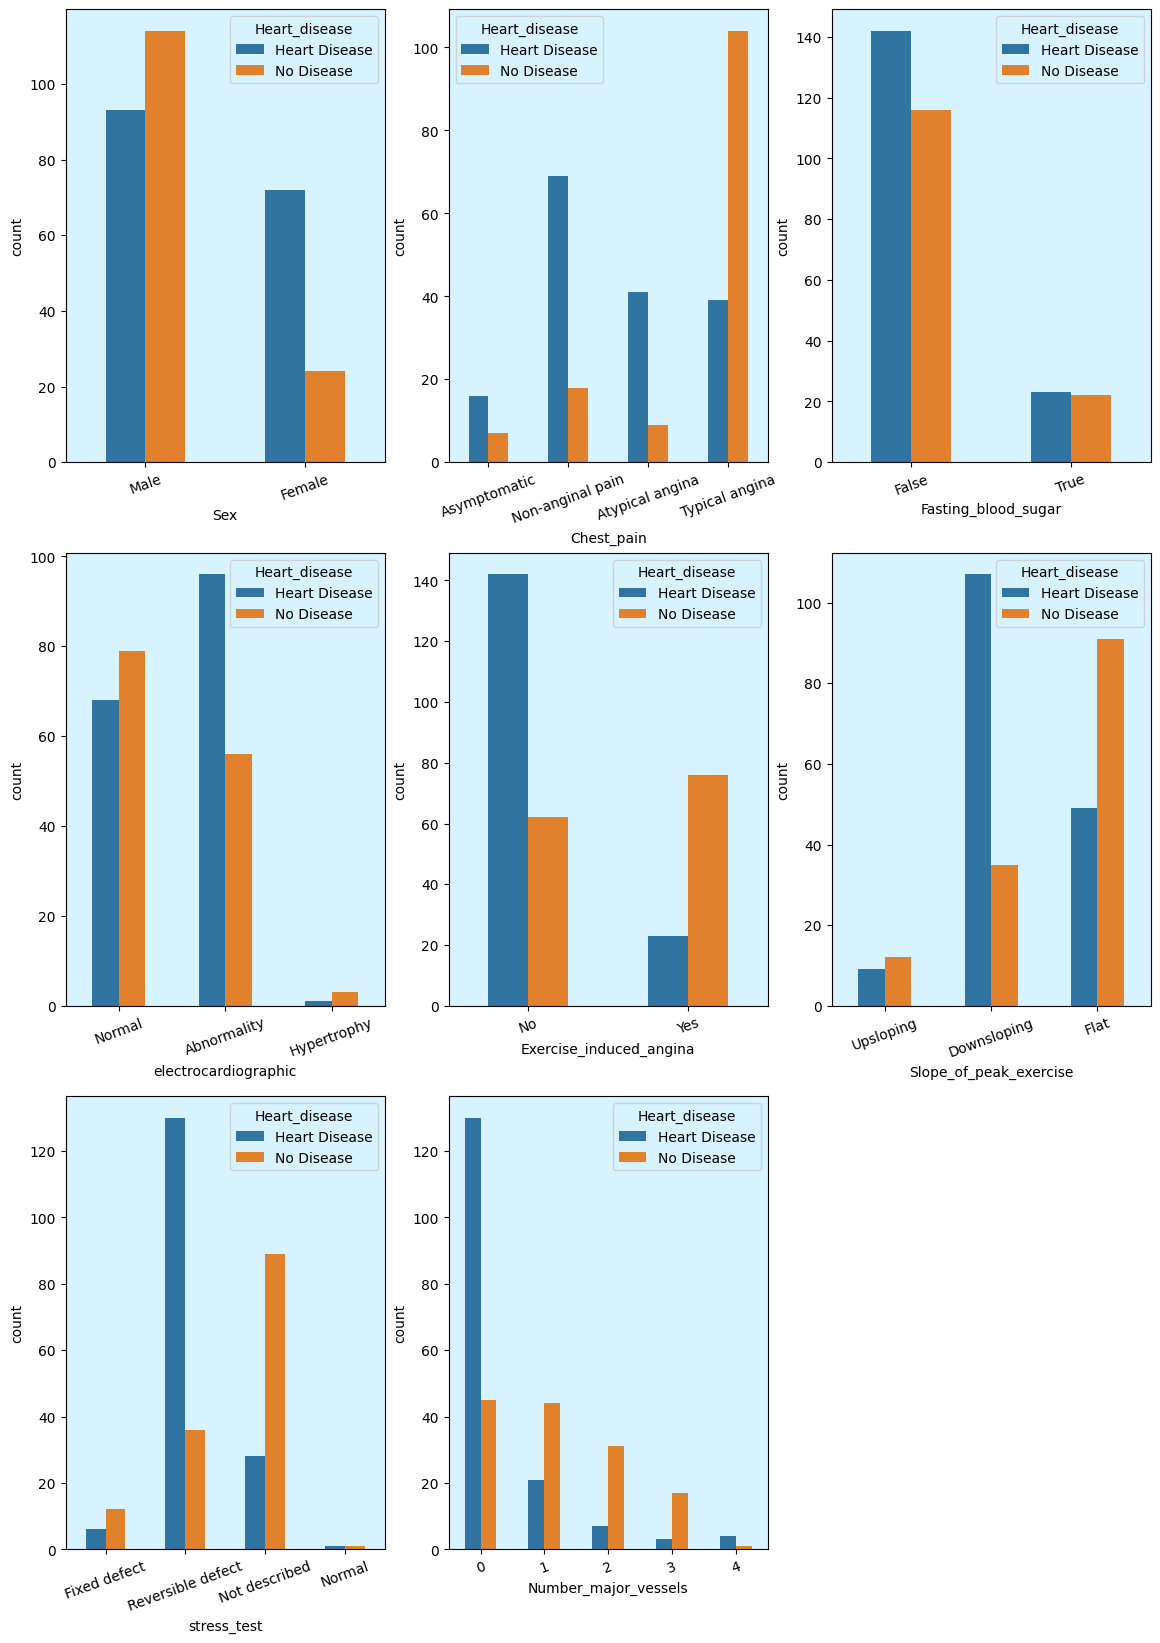

In [431]:
fig, axe = plt.subplots(3, 3, figsize=(14, 20))

for i, feature in enumerate(Categorical_columns):

    row = i // 3
    col = i % 3
    ax = axe[row, col]

    sns.countplot(data=plot_datset, x=feature, hue="Heart_disease", ax=ax, width=0.5)
    ax.set_ylabel("count")
    ax.tick_params(axis="x", rotation=20)
axe[2, 2].remove()

plt.show()